#Ayoub Jdair CS4337 Final Project
18266401


# Imports/Libararies

Using autopep8 (for automatically formatting Python code to conform to the PEP 8 style guide)


In [ ]:
pip install autopep8

In [ ]:
pip install mpld3

Using Pandas (for data manipulation and analysis) & plotly as my interactive visualisations library


In [ ]:
import pandas as pd
import math
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
import plotly.express as px 

#Data Extraction


In [ ]:
confirmed_cases_dataset = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_dataset = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

official_world_wide_dataset_link = "https://github.com/CSSEGISandData/COVID-19/raw/master/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv"
official_world_wide_dataset = pd.read_csv(official_world_wide_dataset_link)

daily_reports_dataset = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
daily_reports_dataset

testing_dataset = pd.read_json("https://jhucoronavirus.azureedge.net/api/v1/testing/daily.json")

# covid_response_measures_dataset = pd.read_csv("https://www.ecdc.europa.eu/sites/default/files/documents/response_graphs_data_2021-11-24.csv")

# Data Manipulation/Preprocessing
Dropping uncessary/unused Collumn Headings
Renaming Collumns for Usability
Removing duplicates in data

Renamed the “Country/Region” column to just “Country”, this simplified access to data.

In [ ]:
confirmed_cases_dataset = confirmed_cases_dataset.drop(['Province/State', 'Lat', 'Long'], axis=1)
confirmed_cases_dataset.rename(columns = { "Country/Region": "Country"}, inplace = True) 

deaths_dataset = deaths_dataset.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths_dataset.rename(columns = { "Country/Region": "Country"}, inplace = True) 

w_w_cases = official_world_wide_dataset.drop(['Province/States', 'WHO region label'], axis=1)
w_w_cases.rename(columns = { "Country/Region": "Country", "WHO region" : "Area"}, inplace = True) 

# daily = daily_reports_dataset.drop_duplicates(subset=['Country_Region'])
# daily = daily_reports_dataset.drop(labels=['FIPS', 'Admin2', 'Province_State', 'Lat', 'Long_', 'Last_Update'], axis=1)

daily = daily_reports_dataset.drop_duplicates(subset=['Country/Region'])
daily = daily_reports_dataset.drop(labels=['Province/State', 'Lat', 'Long'], axis=1)

# Date Exploration
Now, lets take a look at a couple to get a feel for the date


Confirmed Cases Dataset

In [ ]:
confirmed_cases_dataset

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,...,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445,157499,157508,157542,157585
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730,201902,202295,202641,202863
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469,211662,211859,212047,212224
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010,18631,18815,18815,19272
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259,65259,65301,65332,65346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,921122,926720,932357,939463,946043,953547,961038,968684,976672,984805,992735,1000897,1009879,1018346,1026522,1035138,1045397,1055246,1065469,1075094,1084625,1094514,1104835,1143967,1155778,1168228,1181337,1197404,1210340,1224110,1238082,1252590,1266288,1280780,1294778,1309092,1323683,1337523,1352122,1367433
276,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,452997,453782,454172,454509,454799,455099,455099,455099,455689,455949,456186,456407,456632,456632,456632,457154,457390,457477,457729,457950,457950,457950,458448,458698,458956,459213,459479,459479,459479,460053,460053,460799,461157,461467,461467,461467,462219,462621,462958,463277
277,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9791,9799,9806,9810,9831,9843,9858,9870,9883,9891,9902,9907,9912,9918,9918,9936,9936,9947,9950,9954,9955,9955,9961,9967,9972,9977,9979,9981,9987,9995,10004,10006,10006,10020,10021,10025,10034,10043,10047,10047
278,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,209734,209739,209760,209

Confirmed Deaths Datasets

In [ ]:
official_world_wide_dataset

,Province/States,Country/Region,WHO region,WHO region label,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20
0,Confirmed,Globally,NaN,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,4593.0,6065.0,7818.0,9826.0,11953.0,14557.0,17391.0,20630.0,24554.0,28276.0,31481.0,34886.0,37558.0,40554.0,43103.0,45171.0,46997.0,49053.0,50580.0,51857.0,71429.0,73332.0,75204.0,75748.0,76769.0,77794.0,78811.0,79331.0,80239.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Deaths,Globally,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Confirmed,China,Western Pacific Region,NaN,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,4537.0,5997.0,7736.0,9720.0,11821.0,14411.0,17238.0,20471.0,24363.0,28060.0,31211.0,34598.0,37251.0,40235.0,42708.0,44730.0,46550.0,48548.0,50054.0,51174.0,70635.0,72528.0,74280.0,74675.0,75569.0,76392.0,77042.0,77262.0,77780.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Confirmed,Outside of China,NaN,NaN,4.0,5.0,10.0,16.0,23.0,29.0,57.0,56.0,68.0,82.0,106.0,132.0,146.0,153.0,159.0,191.0,216.0,270.0,288.0,307.0,319.0,395.0,441.0,447.0,505.0,526.0,683.0,794.0,804.0,924.0,1073.0,1200.0,1402.0,1769.0,2069.0,2459.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Deaths,China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,106.0,132.0,170.0,213.0,259.0,304.0,361.0,425.0,491.0,564.0,637.0,723.0,812.0,909.0,1017.0,1114.0,1260.0,1381.0,1524.0,1666.0,1772.0,1870.0,2006.0,2121.0,2239.0,2348.0,2445.0,2595.0,2666.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Deaths,NaN,Eastern Mediterranean Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,Confirmed,NaN,Region of the Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,Deaths,NaN,Region of the Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,

# Date Exploration 2 
Understanding The Data

Preforming data exploration greatly aided my understanding of the various dataset

In [ ]:
datasets = [confirmed_cases_dataset, 
            deaths_dataset, 
            official_world_wide_dataset_link, 
            daily_reports_dataset,
            testing_dataset]
            
datasets_names = ["Confirmed Cases Dataset", 
                  "Deaths Dataset",
                  "World Wide Dataset",
                  "Daily Reports Dataset",
                  "Testing Dataset"]

iterator = 0

for dataset in datasets:
  print("------------------- Understanding The ... " + datasets_names[iterator] + " ----------------------")
  print()

  print("-> " +datasets_names[iterator] + ": Data types:")
  print()
  print(dataset.dtypes)
  print()

  print("-> " + datasets_names[iterator] + ": Data columns:")
  print()
  print(dataset.columns)
  print()

  print("-> " + datasets_names[iterator] + ": Data index:")
  print()
  print(dataset.index)
  print()

  print("-> " + datasets_names[iterator] + ": Data Information:")
  print()
  print(dataset.info)
  print()

  print("------------------- Understanding Complete! ----------------------------------")
  print()

  iterator += 1

------------------- Understanding The ... Confirmed Cases Dataset ----------------------

-> Confirmed Cases Dataset: Data types:

Country    object
1/22/20     int64
1/23/20     int64
1/24/20     int64
1/25/20     int64
            ...  
12/5/21     int64
12/6/21     int64
12/7/21     int64
12/8/21     int64
12/9/21     int64
Length: 689, dtype: object

-> Confirmed Cases Dataset: Data columns:

Index(['Country', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '11/30/21', '12/1/21', '12/2/21', '12/3/21', '12/4/21', '12/5/21',
       '12/6/21', '12/7/21', '12/8/21', '12/9/21'],
      dtype='object', length=689)

-> Confirmed Cases Dataset: Data index:

RangeIndex(start=0, stop=280, step=1)

-> Confirmed Cases Dataset: Data Information:

<bound method DataFrame.info of                 Country  1/22/20  1/23/20  ...  12/7/21  12/8/21  12/9/21
0           Afghanistan        0        0  ...   157508   157542   1575

AttributeError: ignored

Creating a dates Dataframe

In [ ]:
#Dropping Country collumn
cases_dates = confirmed_cases_dataset.drop(['Country'], axis=1)
#Pulling collumns with dates, converting to date time format
dates = pd.to_datetime(cases_dates.columns).floor('D')
dates

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09'],
              dtype='datetime64[ns]', length=688, freq=None)

#Visualising The Data



#Visualisation 1
Visualising Moroccan Cofirmed Cases against Ireland

Demonstrates simplicity

In [ ]:
irish_cases = confirmed_cases_dataset[confirmed_cases_dataset.Country == "Ireland"]
moroccan_cases = confirmed_cases_dataset[confirmed_cases_dataset.Country == "Morocco"]

Dropping 'Country' Field before plottng

In [ ]:
irish_cases = irish_cases.drop(['Country'], axis=1)
moroccan_cases = moroccan_cases.drop(['Country'], axis = 1)

Visualising performed using matplotlib

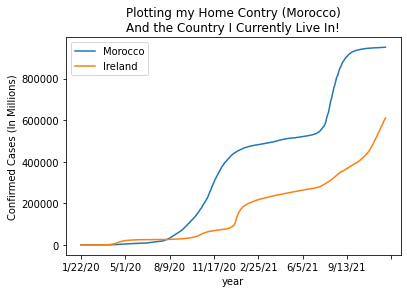

In [ ]:
moroccan_cases.iloc[0].plot(kind = 'line')
irish_cases.iloc[0].plot(kind = 'line')
plt.legend(['Morocco', 'Ireland'])
plt.xlabel('year')
plt.ylabel('Confirmed Cases (In Millions)')
plt.title("Plotting my Home Contry (Morocco)\nAnd the Country I Currently Live In!")
plt.show()

#Visualisation 2
Visualising Moroccan Cofirmed Deaths against Ireland

In [ ]:
irish_deaths = deaths_dataset[deaths_dataset.Country == "Ireland"]
moroccan_deaths = deaths_dataset[deaths_dataset.Country == "Morocco"]

Dropping 'Country' Field before plottng

In [ ]:
irish_deaths = irish_deaths.drop(['Country'], axis=1)
moroccan_deaths = moroccan_deaths.drop(['Country'], axis = 1)

Visualising performed using matplotlib

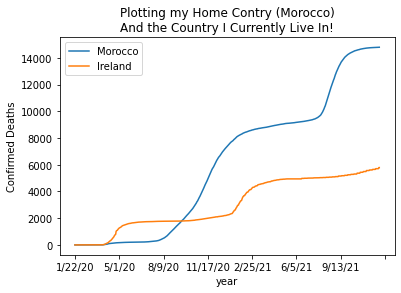

In [ ]:
moroccan_deaths.iloc[0].plot(kind = 'line')
irish_deaths.iloc[0].plot(kind = 'line')
plt.legend(['Morocco', 'Ireland'])
plt.xlabel('year')
plt.ylabel('Confirmed Deaths')
plt.title("Plotting my Home Contry (Morocco)\nAnd the Country I Currently Live In!")
plt.show()

#Visualisation 3
Appending a Totals collumn to all confirmed cases with the sum of each row

In [ ]:
confirmed_cases_dataset.loc['Total']= confirmed_cases_dataset.sum()
# confirmed_cases_dataset = confirmed_cases_dataset.T #Transpose df, now countries are your columns and years your rows
# confirmed_cases_dataset.rename(index = {1 : "Testing"})
# confirmed_cases_dataset.index
# confirmed_cases_dataset

Removing "Country" Field Before Visualisation

In [ ]:
world_wide_dataset = confirmed_cases_dataset.drop(['Country'], axis=1)

Plotting world wide data

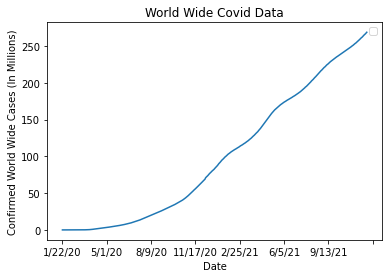

In [ ]:
wwd = world_wide_dataset.iloc[280]
wwd = wwd / 10 ** 6
plt.legend(['World'])
plt.xlabel('Date')
plt.ylabel('Confirmed World Wide Cases (In Millions)')
plt.title("World Wide Covid Data")
ccd.plot()
plt.show()

#Visualisation 4
Plotting All region cases

Preformed standardisation so that my two data shapes and sizes would be compatible ( len(data) came in handy here!)

I also divide one of my datapoints by 10^5 to Understand Magnitudes and employ the principal of colour.




In [ ]:
#Extract Region cases from WHO dataset
european_cases = w_w_cases[w_w_cases.Area == "European Region"]
american_cases = w_w_cases[w_w_cases.Area == "Region of the Americas"]
chinese_cases = w_w_cases[w_w_cases.Area == "Western Pacific Region"]
asian_cases = w_w_cases[w_w_cases.Area == "South-East Asia Region"]
african_cases = w_w_cases[w_w_cases.Area == "African Region"]

european_cases = european_cases.drop(['Country', "Area"], axis=1)
american_cases = american_cases.drop(['Country', "Area"], axis=1)
chinese_cases = chinese_cases.drop(['Country', "Area"], axis=1)
asian_cases = asian_cases.drop(['Country', "Area"], axis=1)
african_cases = african_cases.drop(['Country', "Area"], axis=1)

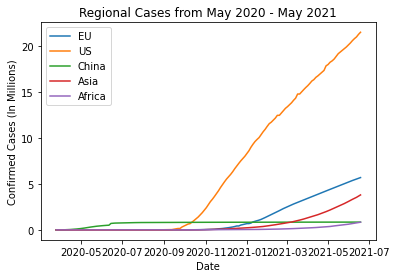

In [ ]:
# len(Dates) MUST equal len(__cases) ! 
# So i am using "::3" to only chooose every 3 dates
plt.plot(dates[63::3], european_cases.iloc[0]/ 10 ** 5)
plt.plot(dates[63::3], american_cases.iloc[0]/ 10 ** 5)
plt.plot(dates[63::3], chinese_cases.iloc[0]/ 10 ** 5)
plt.plot(dates[63::3], asian_cases.iloc[0]/ 10 ** 5)
plt.plot(dates[63::3], african_cases.iloc[0]/ 10 ** 5)
plt.legend(['EU', "US", 'China', 'Asia', 'Africa'])
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (In Millions)')
plt.title("Regional Cases from May 2020 - May 2021")
plt.show()

#Visualisation 5
Interactive visualisations

In [ ]:
daily = daily.drop(['Country/Region'], axis=1)

Visualising global daily reports in zoomable bar chart with tooltips

interactive line plot

In [ ]:
fig = px.line(daily, x=daily.columns, y=daily.values[83])
fig.update_layout(title = {'text': "Global Daily Reports"})
fig.show()

Interactive bar chart uses figure and ground as it pertains to the pricipal of structure

In [ ]:
fig = px.bar(daily, x=daily.columns, y=daily.values[83])
fig.update_layout(title = {'text': "Global Daily Reports"})
fig.show()

#Visualisation 6
Interactive visualisations

Visualising testing reports in the US in an interactive pie chart

In [ ]:
fig = px.pie(testing_dataset, values="tests_viral_positive", names="state")
fig.show()